In [5]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# hacks
import os
import sys
nb_dir = os.path.split(os.path.abspath(os.getcwd()))[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

### Test Files:

In [8]:
import PDFfield
import PDFmodel

### Regeneration:

In [9]:
### uncomment the following cells to force regeneration (takes about 20 minutes / file)
### there's no need to do it unless higher resolution is needed..
helium  = 4
oxygen  = 16
iron    = 56
uranium = 238

In [10]:
# If you want to fetch a rendered model
# Happens nearly instantly.
PDFdict = PDFfield.precompute(iron, 20e18)

In [11]:
#PDFdict = PDFfield.precompute(helium, 2e18, autoload=False)
#PDFdict = PDFfield.precompute(helium, 20e18, autoload=False)
#PDFdict = PDFfield.precompute(helium, 200e18, autoload=False)

In [12]:
#PDFdict = PDFfield.precompute(oxygen, 2e18, autoload=False)
#PDFdict = PDFfield.precompute(oxygen, 20e18, autoload=False)
#PDFdict = PDFfield.precompute(oxygen, 200e18, autoload=False)

In [13]:
#PDFdict = PDFfield.precompute(iron, 2e18, autoload=False)
#PDFdict = PDFfield.precompute(iron, 20e18, autoload=False)
#PDFdict = PDFfield.precompute(iron, 200e18, autoload=False)

In [14]:
#PDFdict = PDFfield.precompute(uranium, 2e18, autoload=False)
#PDFdict = PDFfield.precompute(uranium, 20e18, autoload=False)
#PDFdict = PDFfield.precompute(uranium, 200e18, autoload=False)

In [15]:
PDFdict.keys()

['y', 'x', 'z', 'PDF']

In [16]:
PDFdict['x'].shape

(120L,)

In [17]:
PDFdict['PDF'].shape

(120L, 120L, 120L)

# Performance race

In [18]:
import random
import time

def interpolate(positions):
    start = time.time()
    for position in positions:
        position = np.array(position)
        pdf = PDFfield.cartesianPDF(position, iron, 20e18)
    return time.time() - start

def compute(positions):
    start = time.time()
    for position in positions:
        position = np.array(position)
        pdf = PDFmodel.pdf(position, iron, 20e18)
    return time.time() - start


In [19]:
spacelimit = 6
samples = 10000
np.random.seed(12345)
x = np.random.uniform(-spacelimit, spacelimit, samples)
y = np.random.uniform(-spacelimit, spacelimit, samples)
z = np.random.uniform(-spacelimit, spacelimit, samples)

positions = np.array(zip(x, y, z))
int_time = interpolate(positions)
comp_time = compute(positions)

print 'computational time for {} samples: {} [seconds]'.format(samples,comp_time)
print 'interpolation time for {} samples: {} [seconds]'.format(samples,int_time)
print 'performance ratio (comp/interp): {:.3}x'.format(comp_time/float(int_time))

computational time for 10000 samples: 8.04700016975 [seconds]
interpolation time for 10000 samples: 4.02199983597 [seconds]
performance ratio (comp/interp): 2.0x


# Z vs Y Field near sun

In [20]:
# Z-Y meridian plane (x = 0)
Ro = 0.00465 # radius of Sun in [AU]
w = 50.* Ro
Z, Y = np.mgrid[-w:w:500j,-w:w:500j]
z = Z.flatten()
y = Y.flatten()
size = z.size
x = np.zeros(size)

pdf = np.zeros(size)
for i, (ix, iy, iz) in enumerate(zip(x, y, z)):
    position = np.array([ix, iy, iz])
    pdf[i] = PDFfield.cartesianPDF(position, iron, 20e18)

PDF = pdf.reshape(Z.shape)

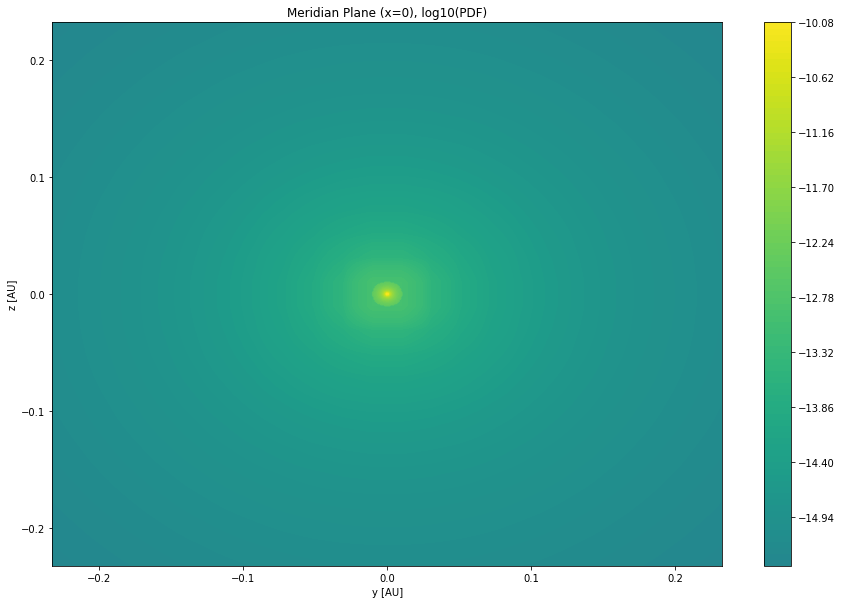

In [21]:
# plot it
plt.figure(figsize=(15,10))
plt.xlim(-w,w) # actually y-axis
plt.ylim(-w,w) # actually z-axis
plt.xlabel('y [AU]')
plt.ylabel('z [AU]')
plt.title('Meridian Plane (x=0), log10(PDF)')
c = plt.contourf(Y,Z,np.log10(PDF), 100)
plt.clim(-20,-10)
plt.colorbar(c, boundaries=np.linspace(-20,-10,10))

# Y vs X near sun

In [22]:
# Y-X equitorial plane (z = 0)
Ro = 0.00465 # radius of Sun in [AU]
w = 50.* Ro
Y, X = np.mgrid[-w:w:500j,-w:w:500j]
y = Y.flatten()
x = X.flatten()
size = y.size
z = np.zeros(size)

pdf = np.zeros(size)
for i, (ix, iy, iz) in enumerate(zip(x, y, z)):
    position = np.array([ix, iy, iz])
    pdf[i] = PDFfield.cartesianPDF(position, iron, 20e18)

PDF = pdf.reshape(Y.shape)

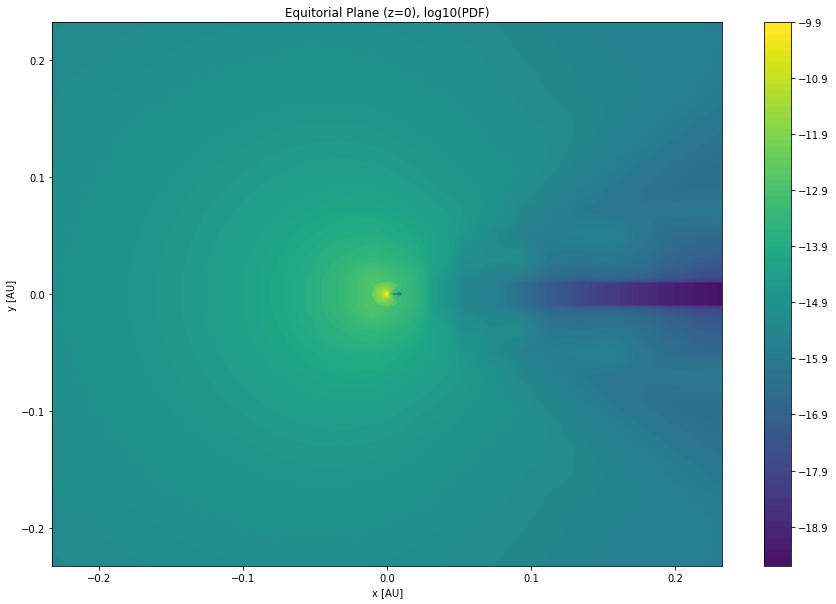

In [23]:
# plot it
plt.figure(figsize=(15,10))
plt.xlim(-w,w) # actually x-axis
plt.ylim(-w,w) # actually y-axis
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Equitorial Plane (z=0), log10(PDF)')
c = plt.contourf(X,Y,np.log10(PDF),100)
plt.clim(-20,-10)
plt.colorbar(c)

# Equitorial Plane

In [24]:
# Y-X equitorial plane (z = 0)
w = 6.
Y, X = np.mgrid[-w:w:500j,-w:w:500j]
y = Y.flatten()
x = X.flatten()
size = z.size
z = np.zeros(size)

pdf = np.zeros(size)
for i, (ix, iy, iz) in enumerate(zip(x, y, z)):
    position = np.array([ix, iy, iz])
    pdf[i] = PDFfield.cartesianPDF(position, iron, 20e18)

PDF = pdf.reshape(Y.shape)

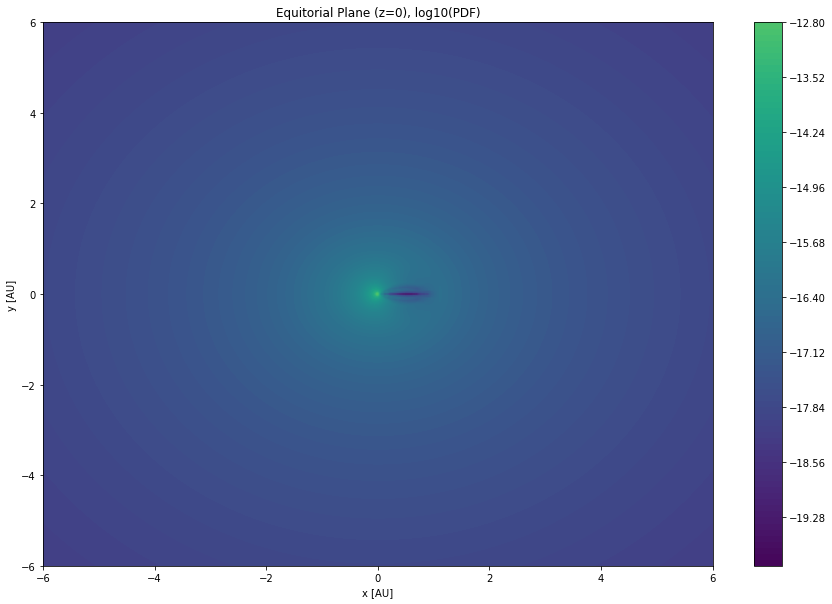

In [25]:
# plot it
plt.figure(figsize=(15,10))
plt.xlim(-w,w) # actually x-axis
plt.ylim(-w,w) # actually y-axis
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Equitorial Plane (z=0), log10(PDF)')
c = plt.contourf(X,Y,np.log10(PDF),100)
plt.clim(-20,-10)
plt.colorbar(c)

## PDF Integrand

In [26]:
def fetchIntegrand(cartesian_pos, mass_number, energy_eV):
    amu2mev = 931.5 # [MeV/c**2] e.g. carbon has an atomic mass of 12, or 12 * amu2mev = 11,178 MeV/c**2
    mass_eV = mass_number * amu2mev * 1e6 # [eV / c**2]
    lorentz_gamma = energy_eV / mass_eV

    alpha_rad = PDFmodel.approximateAngle(cartesian_pos)
    geometry  = 2. * np.cos(alpha_rad / 2.)**2
    sun_dist  = np.sqrt( np.dot( cartesian_pos, cartesian_pos ) )

    solar_e = np.logspace(-3.5,1.1,1001)
    integrand = np.zeros(solar_e.size)
    for i, e in enumerate(solar_e):
        integrand[i] = PDFmodel.integrand(e, lorentz_gamma, mass_number, sun_dist, geometry)
    return (solar_e, integrand)

In [27]:
cartesian_pos = np.asarray([2,0,0])

helium_2e18   = fetchIntegrand(cartesian_pos, helium, 2e18)
helium_200e18 = fetchIntegrand(cartesian_pos, helium, 200e18)

oxygen_2e18   = fetchIntegrand(cartesian_pos, oxygen, 2e18)
oxygen_200e18 = fetchIntegrand(cartesian_pos, oxygen, 200e18)

iron_2e18   = fetchIntegrand(cartesian_pos, iron, 2e18)
iron_200e18 = fetchIntegrand(cartesian_pos, iron, 200e18)

uranium_2e18   = fetchIntegrand(cartesian_pos, uranium, 2e18)
uranium_200e18 = fetchIntegrand(cartesian_pos, uranium, 200e18)

r = np.sqrt( np.dot(cartesian_pos, cartesian_pos) )
energies = helium_2e18[0]
blackbody = np.zeros(energies.size)
for i, e in enumerate(energies):
    blackbody[i] = PDFmodel.solarPhotonDensity(r, e)

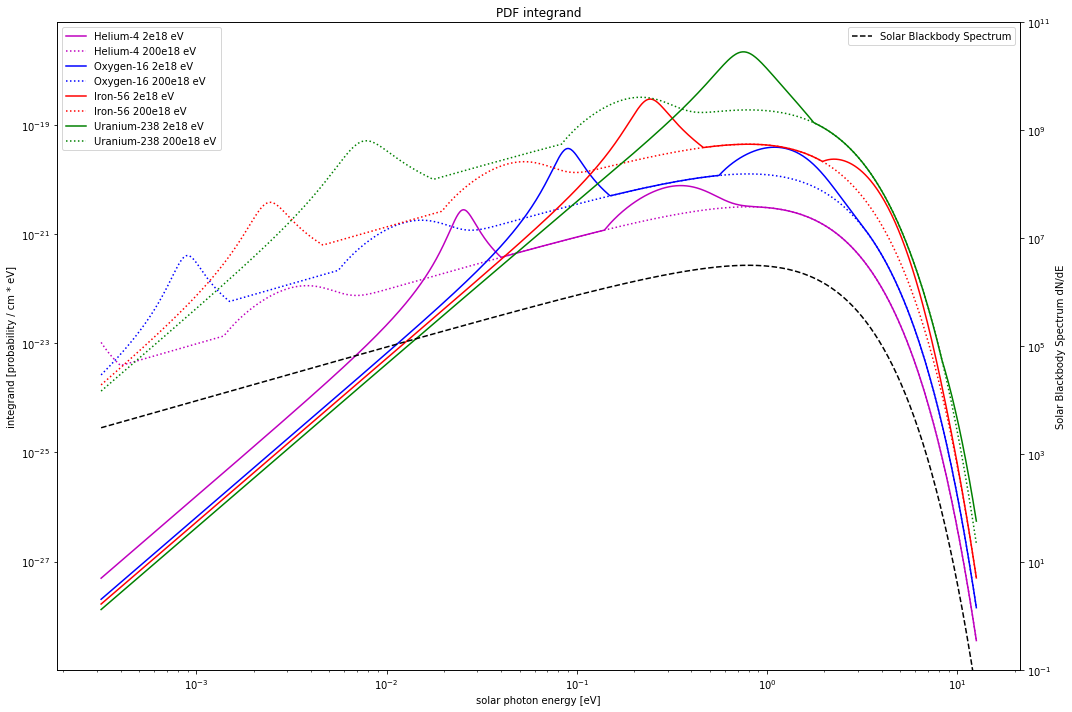

In [28]:
# plot it
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()

ax2.set_ylim(1e-1,1e11)

ax1.set_xlabel('solar photon energy [eV]')
ax1.set_ylabel('integrand [probability / cm * eV]')
ax2.set_ylabel('Solar Blackbody Spectrum dN/dE')
plt.title('PDF integrand')

ax1.loglog(helium_2e18[0]  , helium_2e18[1]  , 'm' , label='Helium-4 2e18 eV')
ax1.loglog(helium_200e18[0], helium_200e18[1], 'm:', label='Helium-4 200e18 eV')

ax1.loglog(oxygen_2e18[0]  , oxygen_2e18[1]  , 'b' , label='Oxygen-16 2e18 eV')
ax1.loglog(oxygen_200e18[0], oxygen_200e18[1], 'b:', label='Oxygen-16 200e18 eV')

ax1.loglog(iron_2e18[0]  , iron_2e18[1]  , 'r' , label='Iron-56 2e18 eV')
ax1.loglog(iron_200e18[0], iron_200e18[1], 'r:', label='Iron-56 200e18 eV')

ax1.loglog(uranium_2e18[0]  , uranium_2e18[1]  , 'g' , label='Uranium-238 2e18 eV')
ax1.loglog(uranium_200e18[0], uranium_200e18[1], 'g:', label='Uranium-238 200e18 eV')

ax2.loglog(energies, blackbody, 'k--', label='Solar Blackbody Spectrum')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()

In [40]:
theta = 45. # [degrees]
phi   = 180. # [degrees]
stepsize = 10000 # [kilometers]
stopdist = 6 # [astronomical units]
mass_number = iron # [unitless]
energy_eV = 20e18 # [electronVolts]
#-----------------------------------

t = theta * np.pi / 180.
p = phi * np.pi / 180.
r_hat = np.asarray([ np.sin(t)*np.cos(p), np.sin(t)*np.sin(p), np.cos(t) ])

pos_earth = np.asarray([1,0,0])

m_per_AU = 149597870700. # unit conversion [meters / astronomical unit]
stepsize *= 1000. / m_per_AU # [astronomical units]
n_steps = int(np.ceil(stopdist / stepsize))

pdf  = np.zeros(n_steps)
dist = np.zeros(n_steps)

for i in xrange(n_steps):
    position = pos_earth + (n_steps - i) * stepsize * r_hat
    pdf[i] = PDFfield.cartesianPDF(position, mass_number, energy_eV) # [probability / meter]
    pdf[i] *= m_per_AU # [probability / AU]
    dist[i] = np.sqrt( np.dot(position - pos_earth, position - pos_earth) ) # [AU]


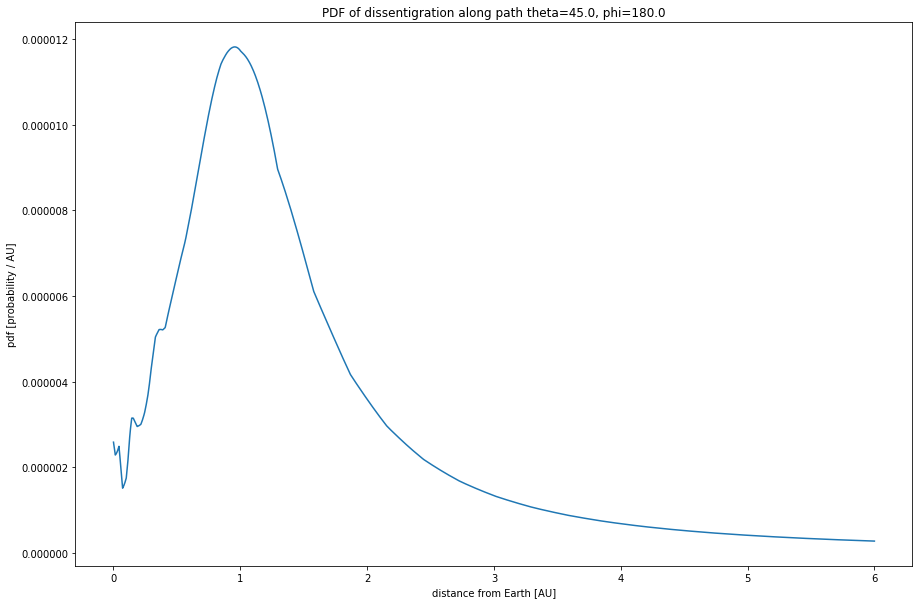

In [41]:
# plot it
plt.figure(figsize=(15,10))
plt.xlabel('distance from Earth [AU]')
plt.ylabel('pdf [probability / AU]')
plt.title('PDF of dissentigration along path theta={}, phi={}'.format(theta, phi))
plt.plot(dist, pdf)

In [43]:
from scipy import integrate
integrate.simps(pdf, dx=stepsize, even='first')

1.8134613940256573e-05